## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [2]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [23]:
from sklearn.cluster import KMeans

# K-means algorithm
model = KMeans(n_clusters=3, random_state=123)
model.fit(X)
centers = model.cluster_centers_
clusters = model.labels_

def total_internal_ss(X, centers, clusters):
       total = 0
       for i, point in enumerate(X):
              cluster = clusters[i]
              center = centers[cluster]
              total += sum(pow(point - center, 2))

       return total

print("Total Internal SS = ", np.round(total_internal_ss(X, centers, clusters), 3))

Total Internal SS =  4665.301


2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [32]:
# Calculating Total Internal SS for different values of K

totals, SSE = [], []
K_range = range(2, 15)
for k in K_range:
       model = KMeans(n_clusters=k, random_state=123)
       model.fit(X)
       centers = model.cluster_centers_
       clusters = model.labels_
       # SSE.append(model.inertia_)
       totals.append(total_internal_ss(X, centers, clusters))

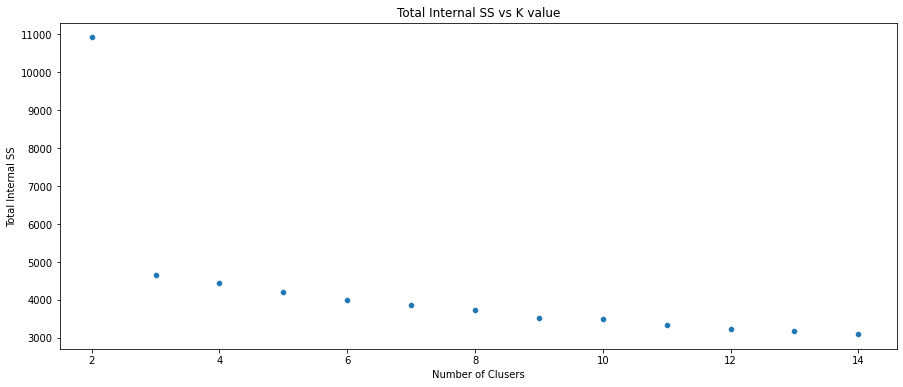

In [34]:
# Plot
import seaborn as sns

plt.figure(figsize=[15, 6])
sns.scatterplot(x=K_range , y=totals)
plt.xlabel("Number of Clusers")
plt.ylabel("Total Internal SS")
plt.title("Total Internal SS vs K value")
plt.xlim(1.5)
plt.show()

<h2>Conclusion</h2>
Using the <u>elbow method</u> we confirm that the optimal K value is as expected, <b>k=3</b>